In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#importing dataset
dataset = panda.read_csv("/content/HateSpeechData.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
#Finding text length of every tweet and and adding it as a field in dataset
dataset['text length'] = dataset['tweet'].apply(len)
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [4]:
# classifying the dataset into hate speech, offensive language and No hate and offensive. 
# Determining whether the tweet is polite or impolite.
dataset["labels"] = dataset["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
dataset["polite/impolite"]=dataset["class"].map({0:"Impolite",
                                          1:"Impolite",
                                          2:"Polite"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length,labels,polite/impolite
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,No Hate and Offensive,Polite
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,Offensive Language,Impolite
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,Offensive Language,Impolite
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,Offensive Language,Impolite
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,Offensive Language,Impolite
...,...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146,Offensive Language,Impolite
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",70,No Hate and Offensive,Polite
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,67,Offensive Language,Impolite
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,37,Offensive Language,Impolite


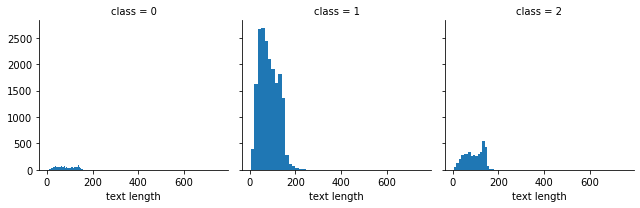

In [5]:
# visualization of data using FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

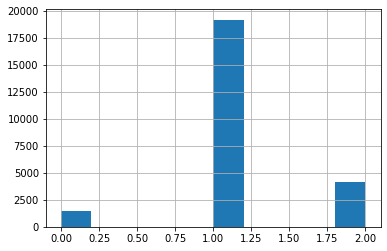

In [6]:
# visualization of data using histogram
dataset['class'].hist()

In [7]:
# The tweets from the csv file are collected into a variable name tweet
tweet=dataset.tweet

**PREPROCESSING OF TWEETS**

In [8]:
stopwords = nltk.corpus.stopwords.words("english")

#including some words used in twitter into stopwords
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
   
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)   

dataset['processed_tweets'] = processed_tweets
print(dataset[["tweet","processed_tweets"]].head(10))

                                               tweet                                   processed_tweets
0  !!! RT @mayasolovely: As a woman you shouldn't...  woman complain clean hous amp man alway take t...
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  boy dat cold tyga dwn bad cuffin dat hoe st place
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         dawg ever fuck bitch start cri confus shit
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...                                   look like tranni
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     shit hear might true might faker bitch told ya
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...      shit blow claim faith somebodi still fuck hoe
6  !!!!!!"@__BrighterDays: I can not just sit up ...              sit hate anoth bitch got much shit go
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...            caus tire big bitch come us skinni girl
8  " &amp; you might not get ya bitch back &amp; ...            

**VISUALIZATIONS**

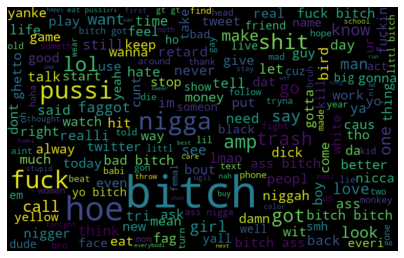

In [9]:
# visualizing most commonly used words 
from wordcloud import WordCloud
all_words = ' '.join([text for text in dataset['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=90).generate(all_words)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**TF-IDF**

In [10]:
#TF-IDF Feature
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
#TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] )
tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

**VARIOUS CLASSIFICATION MODELS USING TF-IDF FEATURE**

In [11]:
# Logistic Regression classifier
X = tfidf
y = dataset['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5) # 50% of data is used for training
model = LogisticRegression().fit(X_train_tfidf,y_train) # calling logistic_regression and sending data for training 
y_preds = model.predict(X_test_tfidf) # making predictions using the test data
report = classification_report( y_test, y_preds ) 
print(report)
acc=accuracy_score(y_test,y_preds) # accuracy score of logistic regression
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.62      0.15      0.24       743
           1       0.90      0.97      0.94      9558
           2       0.85      0.80      0.83      2091

    accuracy                           0.89     12392
   macro avg       0.79      0.64      0.67     12392
weighted avg       0.88      0.89      0.88     12392

Logistic Regression, Accuracy Score: 0.8919464170432537


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
# Random Forest classifier
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)
rf=RandomForestClassifier() # from sklearn.ensemble import RandomForestClassifier
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds)
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.55      0.12      0.20       743
           1       0.92      0.96      0.94      9558
           2       0.83      0.89      0.86      2091

    accuracy                           0.90     12392
   macro avg       0.77      0.66      0.67     12392
weighted avg       0.88      0.90      0.88     12392

Random Forest, Accuracy Score: 0.8994512588766946


In [13]:
#Naive Bayes classifier
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.5)
nb=GaussianNB() #from sklearn.naive_bayes import GaussianNB
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.12      0.31      0.17       743
           1       0.87      0.76      0.81      9558
           2       0.55      0.56      0.55      2091

    accuracy                           0.70     12392
   macro avg       0.51      0.54      0.51     12392
weighted avg       0.77      0.70      0.73     12392

Naive Bayes, Accuracy Score: 0.6954486765655261


In [14]:
#SVM classifier
support =LinearSVC(random_state=20) #from sklearn.svm import LinearSVC
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.51      0.21      0.30       743
           1       0.92      0.96      0.94      9558
           2       0.82      0.83      0.83      2091

    accuracy                           0.89     12392
   macro avg       0.75      0.67      0.69     12392
weighted avg       0.88      0.89      0.88     12392

SVM, Accuracy Score: 0.8903324725629438


In [15]:
# Decision Tree Classifier ,class capable of performing multi-class classification on a dataset
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)
dt=DecisionTreeClassifier()
dt.fit(X_train_tfidf,y_train)   #input 2 arrays (training,class labels)
y_preds=dt.predict(X_test_tfidf)
acc4=accuracy_score(y_test,y_preds)  #finding the accuracy score using this classifier
report=classification_report(y_test,y_preds)
print(report)
print("Deccision Tree Classifier,Accuracy Score:",acc4)

              precision    recall  f1-score   support

           0       0.35      0.27      0.31       743
           1       0.93      0.94      0.93      9558
           2       0.83      0.85      0.84      2091

    accuracy                           0.88     12392
   macro avg       0.70      0.69      0.69     12392
weighted avg       0.87      0.88      0.88     12392

Deccision Tree Classifier,Accuracy Score: 0.881697869593286


In [16]:
# Rochhio classifier,Each class is represented by its centroid, with test samples classified to the class with the nearest centroid.
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)
rc=NearestCentroid()
rc.fit(X_train_tfidf,y_train)  #input 2 arrays (training,class labels)
y_preds=rc.predict(X_test_tfidf)  #To predict test doc
report=classification_report(y_test,y_preds)
print(report)
acc5=accuracy_score(y_test,y_preds)
print("Rochio classifier,Accuracy Score:",acc5)



              precision    recall  f1-score   support

           0       0.39      0.57      0.46       743
           1       0.97      0.85      0.91      9558
           2       0.69      0.96      0.80      2091

    accuracy                           0.85     12392
   macro avg       0.68      0.79      0.72     12392
weighted avg       0.89      0.85      0.86     12392

Rochio classifier,Accuracy Score: 0.8537766300839251


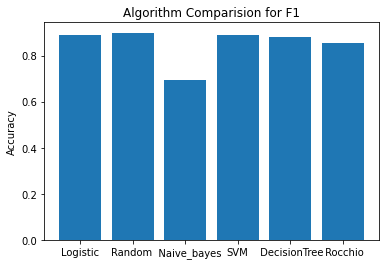

In [17]:
# Comparison among different classifiers based on Accuracy scores
objects = ('Logistic', 'Random ', '   Naive_bayes', 'SVM',' DecisionTree',' Rocchio')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3,acc4,acc5]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

**CONFUSION MATRIX FOR TFIDF**

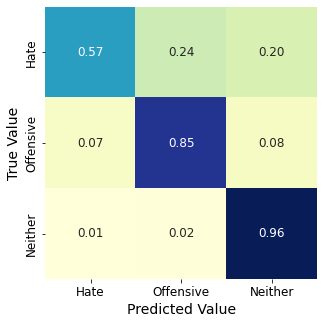

In [18]:
#Matrix using true values and predicted values of different classes.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**SENTIMENT ANALYSIS USING POLARITY SCORES**

In [19]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.0,1.0,0.0
1,0.237,0.000,0.763,0.0,1.0,0.0
2,0.538,0.000,0.462,0.0,2.0,0.0
3,0.000,0.344,0.656,0.0,2.0,0.0
4,0.249,0.081,0.669,0.0,1.0,1.0
...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0,3.0,3.0
24779,0.454,0.000,0.546,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.0,0.0,0.0
24781,0.573,0.000,0.427,0.0,0.0,0.0


**DETECTING HATE SPEECH , OFFENSIVE LANGUAGE & NO HATE SPEECH USING DECISION TREE CLASSIFIER**

In [20]:
! pip install streamlit -q

     |████████████████████████████████| 9.1 MB 5.0 MB/s 
     |████████████████████████████████| 180 kB 57.8 MB/s 
     |████████████████████████████████| 178 kB 56.6 MB/s 
     |████████████████████████████████| 111 kB 71.3 MB/s 
     |████████████████████████████████| 4.3 MB 27.9 MB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 126 kB 69.1 MB/s 
     |████████████████████████████████| 791 kB 60.7 MB/s 
     |████████████████████████████████| 374 kB 54.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.23 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.6.0 which is incompatible.
google-colab 1.0.0 requires ipytho

In [23]:
%%writefile nlp_project.py
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

data = pd.read_csv("/content/HateSpeechData.csv")

data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate and Offensive"})

data = data[["tweet", "labels"]]

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

def hate_speech_detection():
    import streamlit as st
    #page_bg_img = '''<style> body{background-image: url("https://images.unsplash.com/photo-1542281286-9e0a16bb7366");background-size: cover;}</style>'''
    #st.markdown(page_bg_img, unsafe_allow_html=True)
    #st.markdown(""" <style>.font {font-size:50px ; color: #ffffff;</style> """, unsafe_allow_html=True)
    #st.markdown('<p class="font">HATE SPEECH DETECTION</p>',unsafe_allow_html=True)
    st.image("https://omdena.com/wp-content/uploads/2021/10/hatespeech.jpg")
    st.title("Hate Speech And Offensive Language Detection")
    st.subheader("Enter any tweet: ")
    user = st.text_area(" ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = clf.predict(data)
        st.title(a)
hate_speech_detection()

Writing nlp_project.py


In [ ]:
! streamlit run nlp_project.py & npx localtunnel --port 8501

npx: installed 22 in 2.758s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.185.34.232:8501

your url is: https://loud-sloth-48.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
